In [11]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [12]:
#load dataset
study2 = pd.read_csv(r'WTP_master_study2_4PCA.csv', encoding='utf-8-sig')
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(study2)

                       dem_ID  AQ  BISBAS_BIS  BISBAS_BASRR  BISBAS_FS  \
0    56259489ed6e5a0005c80fde  37          26            20         11   
1    58060d08b869700001d70b8c  22          16            20         11   
2    5914b7b50a4b9d0001add64f  24           0             0          0   
3    5a78e410ae9a0b0001a97274  20          19            15          7   
4    5adbc051f6b58c0001fa3bbe  22          26            18          9   
5    5af529ca222e4d0001878444  16          28            18         11   
6    5b48f2d0ff7497000125165e  23          28            19         11   
7    5bb0c112a1c73d0001b9ce9e  23          28            20         14   
8    5beaed3f0af61d0001968d9a  30           0             0          0   
9    5bfadc1846911f0001d7d1eb  34          27            12          8   
10   5c1a8a5e2a85450001a878cd  26          18            10         10   
11   5c3cd553c21f060001c3e571  20          26            17          8   
12   5c4e7b34620ba700010c5dc6  30     

In [13]:
#extract column of participant ids and drop from dataframe
ids = study2['dem_ID']
study2 = study2.drop(['dem_ID'], axis=1)
#store id column in variable called "measures"
measures = study2.columns

In [14]:
#add id column as the index in the dataframe
data = pd.DataFrame(data=study2)
data.index = ids
print(data)

                          AQ  BISBAS_BIS  BISBAS_BASRR  BISBAS_FS  \
dem_ID                                                              
56259489ed6e5a0005c80fde  37          26            20         11   
58060d08b869700001d70b8c  22          16            20         11   
5914b7b50a4b9d0001add64f  24           0             0          0   
5a78e410ae9a0b0001a97274  20          19            15          7   
5adbc051f6b58c0001fa3bbe  22          26            18          9   
5af529ca222e4d0001878444  16          28            18         11   
5b48f2d0ff7497000125165e  23          28            19         11   
5bb0c112a1c73d0001b9ce9e  23          28            20         14   
5beaed3f0af61d0001968d9a  30           0             0          0   
5bfadc1846911f0001d7d1eb  34          27            12          8   
5c1a8a5e2a85450001a878cd  26          18            10         10   
5c3cd553c21f060001c3e571  20          26            17          8   
5c4e7b34620ba700010c5dc6  30      

In [15]:
#transpose dataframe so that the rows represent measures and columns represent each participant
data = data.transpose()
print(data)

dem_ID                  56259489ed6e5a0005c80fde  58060d08b869700001d70b8c  \
AQ                                     37.000000                 22.000000   
BISBAS_BIS                             26.000000                 16.000000   
BISBAS_BASRR                           20.000000                 20.000000   
BISBAS_FS                              11.000000                 11.000000   
BISBAS_BASD                            15.000000                 12.000000   
BRCS                                   18.000000                 17.000000   
CESD                                   28.000000                 14.000000   
COVIDexperience_score                  13.000000                 13.000000   
COVIDimpacts_score                     39.000000                 40.000000   
COVIDpsychstress_score                  3.000000                  5.000000   
COVIDthreat_score                      24.000000                 20.000000   
IRI_FS                                 26.000000                

In [16]:
#return 1st five values of dataframe
print(data.head())
#return dimensions of our data matrix: 28 measures by 226 participants
print(data.shape)

dem_ID        56259489ed6e5a0005c80fde  58060d08b869700001d70b8c  \
AQ                                37.0                      22.0   
BISBAS_BIS                        26.0                      16.0   
BISBAS_BASRR                      20.0                      20.0   
BISBAS_FS                         11.0                      11.0   
BISBAS_BASD                       15.0                      12.0   

dem_ID        5914b7b50a4b9d0001add64f  5a78e410ae9a0b0001a97274  \
AQ                                24.0                      20.0   
BISBAS_BIS                         0.0                      19.0   
BISBAS_BASRR                       0.0                      15.0   
BISBAS_FS                          0.0                       7.0   
BISBAS_BASD                        0.0                      10.0   

dem_ID        5adbc051f6b58c0001fa3bbe  5af529ca222e4d0001878444  \
AQ                                22.0                      16.0   
BISBAS_BIS                        26.0        

In [19]:
#STEP 1: before PCA, scale and center the data
#Standardizarion ensures the range of the continous inital variables each equally contributes to the analysis
scaled_data = preprocessing.scale(data.T)
print(scaled_data)
#alternative function: StandardScaler().fit_transform(data.T)


[[ 2.26683177  0.95276084  0.88465996 ...  0.27171972 -0.14871169
   0.27171972]
 [ 0.07124328 -0.02332234  0.88465996 ... -0.34700731  0.15003357
  -0.34700731]
 [ 0.36398842 -1.58505544 -1.66388244 ... -1.12041609 -0.59682958
  -1.12041609]
 ...
 [ 0.07124328 -0.21853898  0.37495148 ...  0.58108324  0.15003357
   0.58108324]
 [-0.22150185  0.85515253  0.88465996 ...  0.58108324  1.49438724
   0.58108324]
 [ 0.07124328  0.75754421  0.62980572 ... -0.50168906  0.44877883
  -0.50168906]]


In [20]:
#in sklearn, variation is calculated as:
#(measurements - mean)^2 / number of measurements

In [21]:

#create PCA object
#sklearn uses objects that can be trained using one dataseet and applied to another dataset
pca = PCA()
#machine learning set up
#call fit method on scaled data, where all PCA math occurs (i.e. calculate loading scores and the variation each principal component accounts for)
pca.fit(scaled_data)
#generate coordinates for PCA graph based on loading scores and scaled data
pca_data = pca.transform(scaled_data)

In [22]:
#drawing a graph
#create a screeplot to see how many principal components should go into the final plot


In [23]:
#calculate the percentage of variation that each principal component accounts for
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)

In [24]:
#now create labels for scree plot, 1 label per principal component; PC1, PC2, etc
labels = ['PC' +str(x) for x in range(1,len(per_var)+1)]


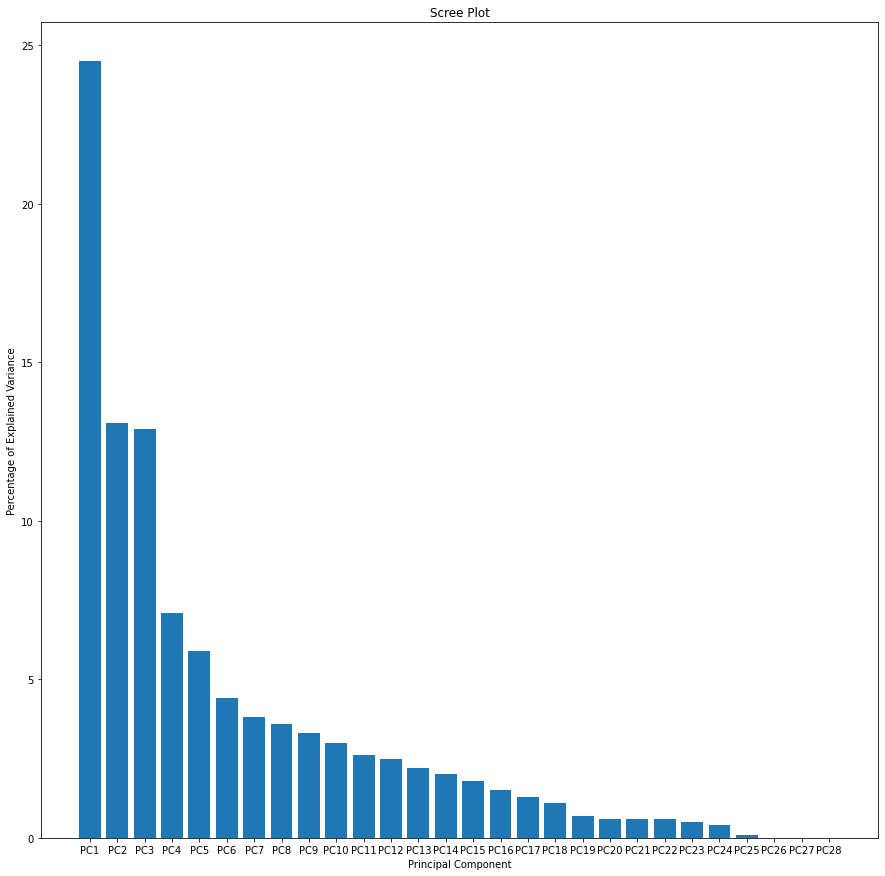

In [25]:
#use matplotlib to create a bar plot
plt.figure(figsize=(15,15))
plt.bar(x=range(1,len(per_var)+1), height= per_var,tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [26]:
#almost all of the variation is along PC1, so a 2d graph using PC1 and PC2 should do a good job representing the original data

In [27]:
#draw a PCA plot
#first, put the new coordinates created by pca.transform(scaled.data)
#into a matrix where the rows have the participant ids and the columns have PC labels
pca_df = pd.DataFrame(pca_data, index=ids,columns=labels)
print(pca_df)

                               PC1       PC2       PC3       PC4       PC5  \
dem_ID                                                                       
56259489ed6e5a0005c80fde  0.230420 -1.797553 -0.119642  2.124734 -1.292457   
58060d08b869700001d70b8c -1.117134 -1.237330 -0.962323  0.305567 -1.310978   
5914b7b50a4b9d0001add64f  0.425247  3.377935 -3.682599 -0.617332 -0.268306   
5a78e410ae9a0b0001a97274 -4.049628 -0.497905 -1.355508  0.957487 -1.311823   
5adbc051f6b58c0001fa3bbe  4.454685 -1.333961  0.594376  1.295114 -0.956988   
5af529ca222e4d0001878444  2.282729 -1.040579  0.539758  1.137556  0.898222   
5b48f2d0ff7497000125165e  0.425717 -1.541590 -0.352760  1.549761  1.452813   
5bb0c112a1c73d0001b9ce9e -1.575864 -2.316506  3.452960 -1.172839  0.510261   
5beaed3f0af61d0001968d9a  5.953128  3.500710  2.055711 -1.108803 -0.982360   
5bfadc1846911f0001d7d1eb  6.437495 -0.130196 -0.335550 -1.542621 -1.329765   
5c1a8a5e2a85450001a878cd  2.734578  0.331096 -1.597720 -0.570295

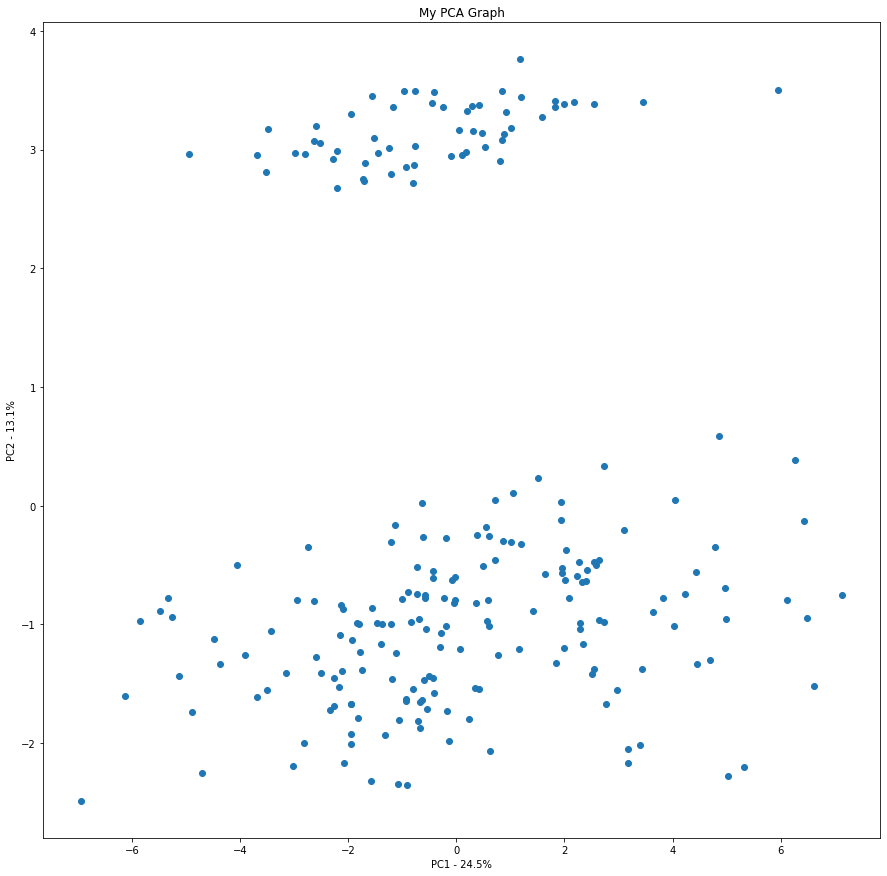

In [28]:
#Visualize the distribution of the samples
#draw a scatter plot
plt.figure(figsize=(15,15))
plt.scatter(pca_df.PC1,pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
#add sample names to graph
# for sample in pca_df.index:
#     plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC2.loc[sample]))
plt.show()

In [35]:
print(pca.components_[0])

[ 0.24700958  0.10448232  0.01455692  0.00608876 -0.01828176 -0.2263751
  0.31006171 -0.01294844  0.05152724 -0.07719772  0.05747442  0.02481484
 -0.11491569  0.13764474 -0.16271977  0.19240247  0.1872444   0.17723024
 -0.25798724 -0.26334503  0.13194959 -0.29802605  0.29192923  0.31461089
 -0.2499069  -0.16436892 -0.2499069  -0.16436892]


In [30]:
#PC1
#The next step in our interpretation is to understand how our variables contribute to each of the principal components, and this is revealed by the loadings.
#look at the loading scores for PC1 to determine which measures had the largest influence
#... on separating the two clusters along the x-axis

#loading scores- can be understood as the weights for each original variable when calculating the principal component

#  Positive loadings indicate a variable and a principal component are positively correlated: an increase in one results in an increase in the other. 
# Negative loadings indicate a negative correlation. 
#Large (either positive or negative) loadings indicate that a variable has a strong effect on that principal component.


AQ                        0.247010
BISBAS_BIS                0.104482
BISBAS_BASRR              0.014557
BISBAS_FS                 0.006089
BISBAS_BASD              -0.018282
BRCS                     -0.226375
CESD                      0.310062
COVIDexperience_score    -0.012948
COVIDimpacts_score        0.051527
COVIDpsychstress_score   -0.077198
COVIDthreat_score         0.057474
IRI_FS                    0.024815
IRI_EC                   -0.114916
IRI_PD                    0.137645
IRI_PT                   -0.162720
LSAS                      0.192402
LSAS_FEAR                 0.187244
LSAS_AVOIDANCE            0.177230
Mood                     -0.257987
MSPSS                    -0.263345
MSSSF                     0.131950
RSE                      -0.298026
STAI                      0.291929
UCLA_loneliness           0.314611
UM_AFFILIATION           -0.249907
UM_INTIMACY              -0.164369
UM_AFFILIATION_mean      -0.249907
UM_INTIMACY_mean         -0.164369
dtype: float64


In [ ]:
#create series obj w/ the loading scores in PC1
loading_scores = pd.Series(pca.components_[0], index=measures)
print(loading_scores)
#sort loading scores based on their magnitude(absolute value)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
#get the names of the top 10 indexes (measure names )
top_10_measures = sorted_loading_scores[0:10].index.valuesMusi

In [31]:
#print top 10 measures and their corresponding loading scores
print(loading_scores[top_10_measures])

UCLA_loneliness        0.314611
CESD                   0.310062
RSE                   -0.298026
STAI                   0.291929
MSPSS                 -0.263345
Mood                  -0.257987
UM_AFFILIATION        -0.249907
UM_AFFILIATION_mean   -0.249907
AQ                     0.247010
BRCS                  -0.226375
dtype: float64


In [36]:
#PC2
#look at the loading scores for PC2 to determine which measures had the largest influence
#... on separating the two clusters along the x-axis
#create series obj w/ the loading scores in PC1
loading_scores = pd.Series(pca.components_[1], index=measures)
print(loading_scores)
#sort loading scores based on their magnitude(absolute value)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
#get the names of the top 10 indexes (measure names )
top_10_measures = sorted_loading_scores[0:10].index.values

AQ                        0.050666
BISBAS_BIS               -0.470200
BISBAS_BASRR             -0.509268
BISBAS_FS                -0.484557
BISBAS_BASD              -0.479487
BRCS                     -0.064658
CESD                     -0.068001
COVIDexperience_score     0.003240
COVIDimpacts_score        0.020678
COVIDpsychstress_score   -0.023382
COVIDthreat_score         0.002508
IRI_FS                   -0.065750
IRI_EC                   -0.061699
IRI_PD                    0.067027
IRI_PT                   -0.092732
LSAS                      0.043651
LSAS_FEAR                 0.063299
LSAS_AVOIDANCE            0.021065
Mood                     -0.020004
MSPSS                     0.055824
MSSSF                    -0.010862
RSE                       0.028195
STAI                     -0.002735
UCLA_loneliness          -0.071952
UM_AFFILIATION           -0.044646
UM_INTIMACY              -0.025626
UM_AFFILIATION_mean      -0.044646
UM_INTIMACY_mean         -0.025626
dtype: float64


In [37]:
#print top 10 measures and their corresponding loading scores for PC 2
print(loading_scores[top_10_measures])

BISBAS_BASRR      -0.509268
BISBAS_FS         -0.484557
BISBAS_BASD       -0.479487
BISBAS_BIS        -0.470200
IRI_PT            -0.092732
UCLA_loneliness   -0.071952
CESD              -0.068001
IRI_PD             0.067027
IRI_FS            -0.065750
BRCS              -0.064658
dtype: float64
